###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

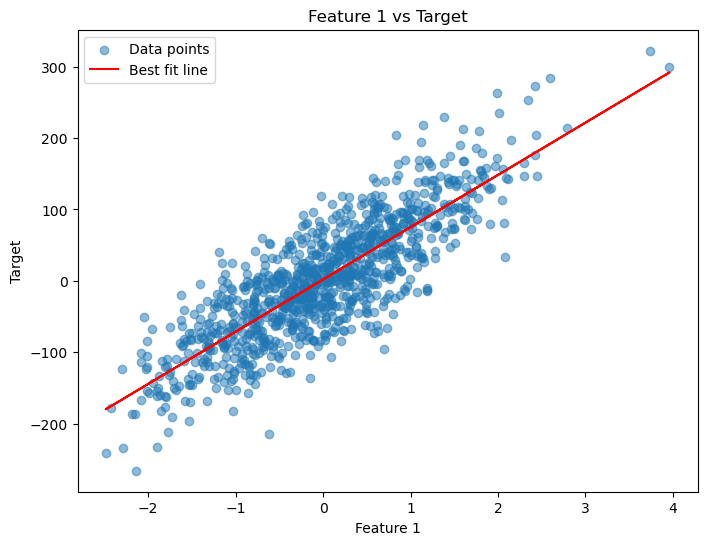

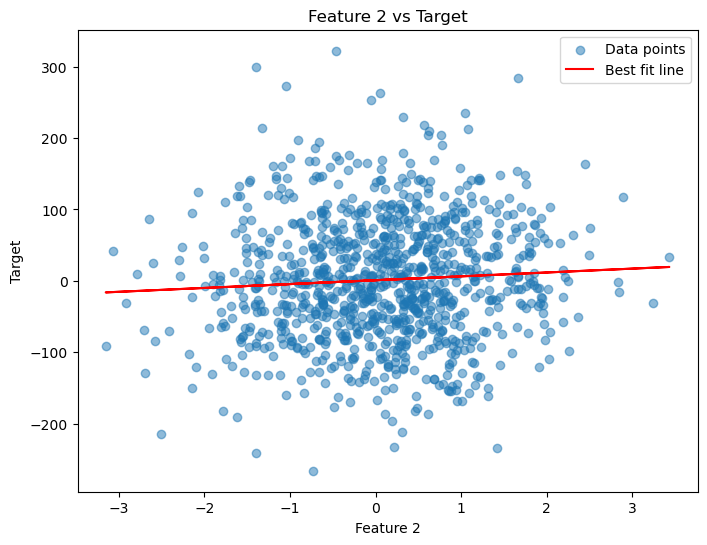

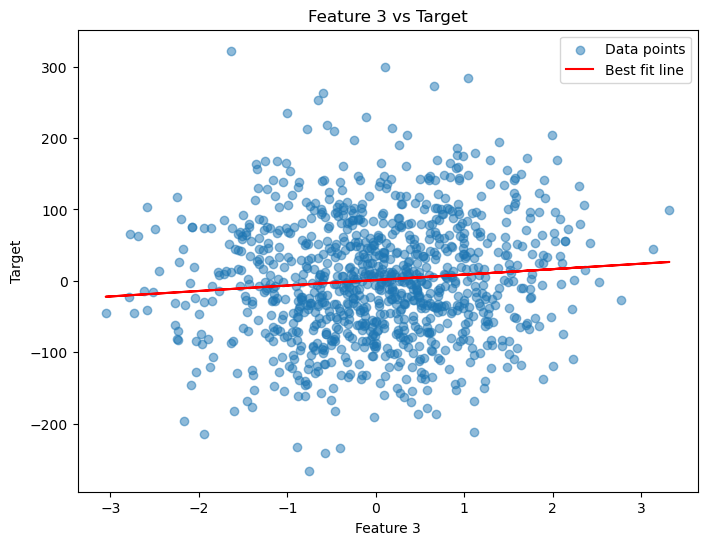

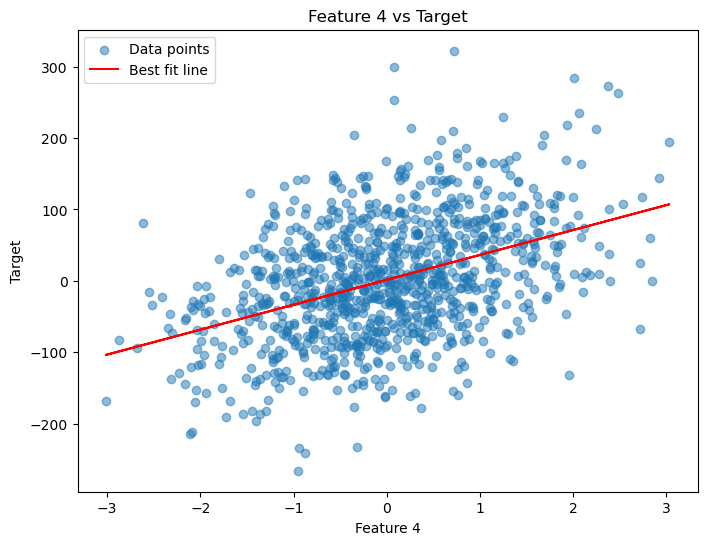

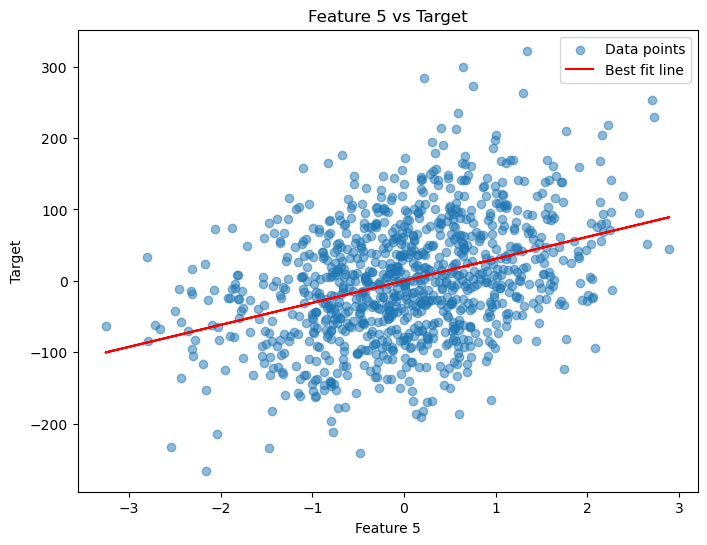

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate the dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=1)

# Function to plot feature vs target with regression line
def plot_feature_vs_target(X, y, feature_index):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, feature_index], y, alpha=0.5, label='Data points')
    
    # Calculate the best fit line using numpy
    coeffs = np.polyfit(X[:, feature_index], y, 1)
    best_fit_line = np.polyval(coeffs, X[:, feature_index])
    
    plt.plot(X[:, feature_index], best_fit_line, color='red', label='Best fit line')
    plt.xlabel(f'Feature {feature_index + 1}')
    plt.ylabel('Target')
    plt.title(f'Feature {feature_index + 1} vs Target')
    plt.legend()
    plt.show()

# Plot each feature
for feature_index in range(X.shape[1]):
    plot_feature_vs_target(X, y, feature_index)


### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

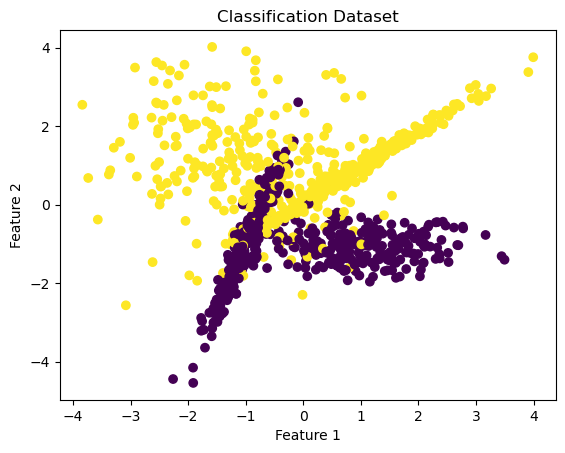

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate the dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2,
                         n_clusters_per_class=2, random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

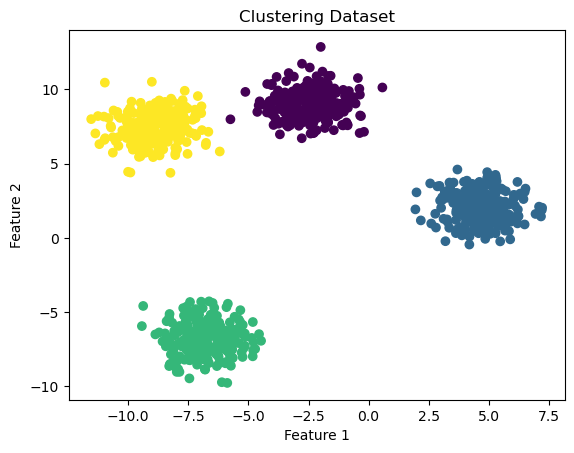

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate the dataset
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Clustering Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [21]:
import requests as req
import pandas as pd
url = 'https://www.worldometers.info/coronavirus/'
page= req.get(url)
print(page.status_code)

200


In [39]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text,'lxml')
table = soup.find('table', id='main_table_countries_today')
headers = []
first_row=table.find('tr');
for i in first_row.find_all('th'):
    title = i.text
    headers.append(title)
data = []
for row in table.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) > 0:
        data.append([col.text.strip() for col in columns])
df = pd.DataFrame(data, columns=headers)
desired_columns = {'Country,Other': 'Country','Continent': 'Continent','Population': 'Population','TotalCases': 'TotalCases','NewCases': 'NewCases','TotalDeaths': 'TotalDeaths','NewDeaths': 'NewDeaths','TotalRecovered': 'TotalRecovered','NewRecovered': 'NewRecovered','ActiveCases': 'ActiveCases'
}
existing_columns = [col for col in desired_columns.keys() if col in df.columns]
renamed_columns = {col: desired_columns[col] for col in existing_columns}
df = df[existing_columns]
df.rename(columns=renamed_columns, inplace=True)
df.head()

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,North America,North America,,"131,889,132",,"1,695,941",,"127,665,129",+350,"2,528,062"
1,Asia,Asia,,"221,500,265",,"1,553,662",,"205,673,091",,"14,273,512"
2,Europe,Europe,,"253,406,198",,"2,101,824",,"248,754,104",+474,"2,550,270"
3,South America,South America,,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962"
4,Oceania,Australia/Oceania,,"14,895,771",,"33,015",,"14,752,388",,"110,368"


# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

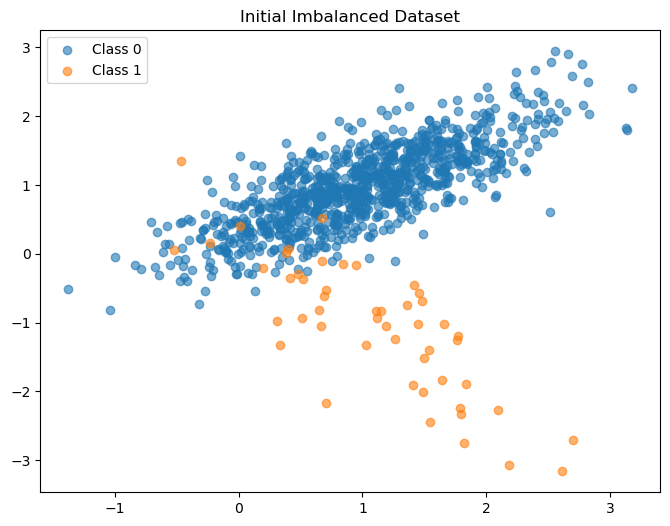

Initial class distribution: Counter({0: 950, 1: 50})


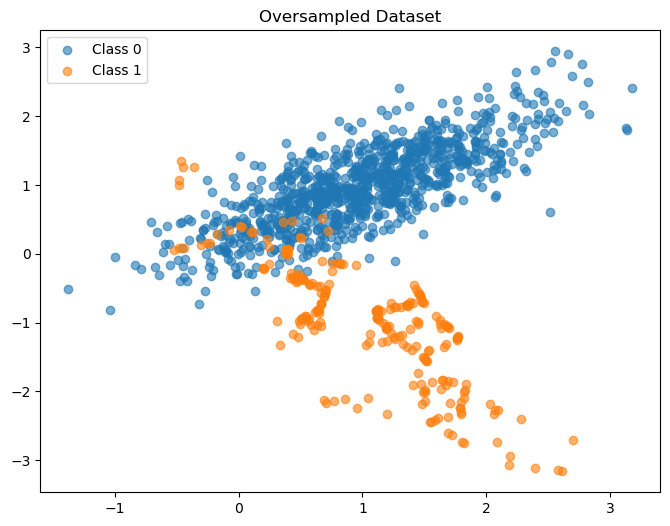

Class distribution after oversampling: Counter({0: 950, 1: 237})


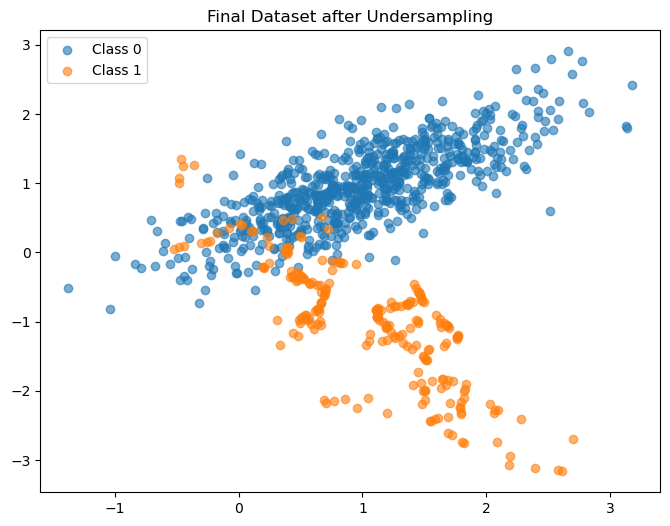

Class distribution after undersampling: Counter({0: 711, 1: 237})


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Generate the dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0, random_state=1)

# Step 2: Plot the initial imbalanced dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.6)
plt.legend()
plt.title("Initial Imbalanced Dataset")
plt.show()

# Step 3: Confirm the class imbalance
counter = Counter(y)
print("Initial class distribution:", counter)

# Step 4: Oversample the minority class using SMOTE
smote = SMOTE(sampling_strategy=0.25, random_state=1) # This will make minority class 5 times its initial size
X_res, y_res = smote.fit_resample(X, y)

# Step 5: Plot the oversampled dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label='Class 1', alpha=0.6)
plt.legend()
plt.title("Oversampled Dataset")
plt.show()

# Verify the number after oversampling
counter_res = Counter(y_res)
print("Class distribution after oversampling:", counter_res)

# Step 6: Undersample the majority class using RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1.0/3.0, random_state=1) # Majority class to 3 times minority class
X_final, y_final = rus.fit_resample(X_res, y_res)

# Step 7: Plot the undersampled dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_final[y_final == 0][:, 0], X_final[y_final == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X_final[y_final == 1][:, 0], X_final[y_final == 1][:, 1], label='Class 1', alpha=0.6)
plt.legend()
plt.title("Final Dataset after Undersampling")
plt.show()

# Verify the number after undersampling
counter_final = Counter(y_final)
print("Class distribution after undersampling:", counter_final)


##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)

print("First 5 rows of the DataFrame:")
print(df.head())

missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("\nDimensions of the training set:", X_train.shape)
print("Dimensions of the testing set:", X_test.shape)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

print("\nFirst 5 rows of the standardized training set:")
print(pd.DataFrame(X_train_std, columns=iris.feature_names).head())


First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Dimensions of the training set: (105, 4)
Dimensions of the testing set: (45, 4)

First 5 rows of the standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           2.260502         -1.050897           1.776229          1.423710
1          -0.118974          1.827647          -1.144919         -1.142634
2          -0.95179